## Logistic Regression Modeling for Early Stage Diabetes Risk Prediction

## Part 2.1: Getting familiar with linear algebraic functions

#### Tasks
- Create matrix of size 10*10 with random integer numbers
- Compute the following linear algebric operations on the matrix using built in functions supported in Numpy, Scipy etc.
  - Find inverse of the matrix and print it
  - Calculate dot product of the matrix with same matrix in transpose A.AT
  - Decompose the original matrix using eigen decomposition print the eigen values and eigen vectors
  - Calculate jacobian matrix 
  - Calculate hessian matrix

In [30]:
!pip install numdifftools -q
import autograd.numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt

In [2]:
matr = np.random.random((10,10))

In [3]:
eig_values, eig_vectors = np.linalg.eig(matr)

In [4]:
def cost(x):
    y = x**3
    return y

In [5]:
import autograd

jac = autograd.jacobian(cost)
hes = autograd.hessian(cost)

In [8]:
nd.Hessian(cost)(4.)

array([[24.]])

## Part 2.2: Logistic Regression using newton method

### Logistic regression
Logistic regression uses an equation as the representation, very much like linear regression.

Input values (x) are combined linearly using weights or coefficient values (referred to as W) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a continuous value.<br>

###  $\hat{y}(w, x) = \frac{1}{1+exp^{-(w_0 + w_1 * x_1 + ... + w_p * x_p)}}$

#### Dataset
The dataset is available at <strong>"data/diabetes_data.csv"</strong> in the respective challenge's repo.<br>
<strong>Original Source:</strong> http://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv. The dataset just got released in July 2020.<br><br>

#### Features (X)

1. Age                - Values ranging from 16-90
2. Gender             - Binary value (Male/Female)
3. Polyuria           - Binary value (Yes/No)
4. Polydipsia         - Binary value (Yes/No)
5. sudden weight loss - Binary value (Yes/No)
6. weakness           - Binary value (Yes/No)
7. Polyphagia         - Binary value (Yes/No)
8. Genital thrush     - Binary value (Yes/No)
9. visual blurring    - Binary value (Yes/No)
10. Itching           - Binary value (Yes/No)
11. Irritability      - Binary value (Yes/No)
12. delayed healing   - Binary value (Yes/No)
13. partial paresis   - Binary value (Yes/No)
14. muscle stiffness  - Binary value (Yes/No)
15. Alopecia          - Binary value (Yes/No)
16. Obesity           - Binary value (Yes/No)

#### Output/Target target (Y) 
17. class - Binary class (Positive/Negative)

#### Objective
To learn logistic regression and practice handling of both numerical and categorical features

#### Tasks
- Download, load the data and print first 5 and last 5 rows
- Transform categorical features into numerical features. Use label encoding or any other suitable preprocessing technique
- Since the age feature is in larger range, age column can be normalized into smaller scale (like 0 to 1) using different methods such as scaling, standardizing or any other suitable preprocessing technique (Example - sklearn.preprocessing.MinMaxScaler class)
- Define X matrix (independent features) and y vector (target feature)
- Split the dataset into 60% for training and rest 40% for testing (sklearn.model_selection.train_test_split function)
- Train Logistic Regression Model on the training set (sklearn.linear_model.LogisticRegression class)
- Use the trained model to predict on testing set
- Print 'Accuracy' obtained on the testing dataset i.e. (sklearn.metrics.accuracy_score function)

#### Further fun (will not be evaluated)
- Plot loss curve (Loss vs number of iterations)
- Preprocess data with different feature scaling methods (i.e. scaling, normalization, standardization, etc) and observe accuracies on both X_train and X_test
- Training model on different train-test splits such as 60-40, 50-50, 70-30, 80-20, 90-10, 95-5 etc. and observe accuracies on both X_train and X_test
- Shuffling of training samples with different *random seed values* in the train_test_split function. Check the model error for the testing data for each setup.
- Print other classification metrics such as:
    - classification report (sklearn.metrics.classification_report),
    - confusion matrix (sklearn.metrics.confusion_matrix),
    - precision, recall and f1 scores (sklearn.metrics.precision_recall_fscore_support)

#### Helpful links
- Scikit-learn documentation for logistic regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- How Logistic Regression works: https://machinelearningmastery.com/logistic-regression-for-machine-learning/
- Feature Scaling: https://scikit-learn.org/stable/modules/preprocessing.html
- Training testing splitting: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Classification metrics in sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~*cn3SQ43k0BGDrG9_YOn4g*

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [10]:
!wget 'https://raw.githubusercontent.com/DeepConnectAI/challenge-week-3/master/data/diabetes_data.csv'

--2020-08-30 13:40:28--  https://raw.githubusercontent.com/DeepConnectAI/challenge-week-3/master/data/diabetes_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34161 (33K) [text/plain]
Saving to: ‘diabetes_data.csv’

diabetes_data.csv   100%[===================>]  33.36K  --.-KB/s    in 0.02s   

2020-08-30 13:40:29 (2.16 MB/s) - ‘diabetes_data.csv’ saved [34161/34161]



In [11]:
# NOTE: DO NOT CHANGE THE VARIABLE NAME(S) IN THIS CELL
# Load the data
np.random.seed(1)
data = pd.read_csv("diabetes_data.csv")

In [12]:
data.insert(0, 'intercept', 1, True)

In [13]:
data.head()

,intercept,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,1,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,1,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,1,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [14]:
data.tail()

,intercept,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,1,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,1,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,1,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,1,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,1,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [ ]:
# Handle categorical/binary columns

In [15]:
yes_no_columns = [c for c in data.columns if c not in ['intercept','Age','Gender','class']]

In [16]:
data[yes_no_columns] = pd.DataFrame(np.where(data[yes_no_columns].values=='Yes', 1, 0), data.index)

In [17]:
data['Gender'] = data['Gender'].map(dict(Female=1, Male=0))
data['class'] = data['class'].map(dict(Positive=1, Negative=0))

In [ ]:
# Normalize the age feature

In [18]:
data['Age'] = MinMaxScaler().fit_transform(data[['Age']])

In [19]:
# Define your X and y
X = data[[c for c in data.columns if c!='class']].values
y = data['class'].values

In [20]:
# Split the dataset into training and testing here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [21]:
def predict(X, weights):
    ### START CODE HERE ###
    z = np.dot(X, weights)
    logits = sigmoid(z)
    y_pred = logits.round()
    ### END CODE HERE ###
    
    return y_pred

In [22]:
def sigmoid(z):
        ### START CODE HERE
        sig_z = 1./(1. + np.exp(-z))
        ### END CODE HERE
        
        assert (z.shape==sig_z.shape), 'Error in sigmoid implementation. Check carefully'
        return sig_z

In [23]:
def cross_entropy_loss(y_true, y_pred):
    # Fix 0 values in y_pred
    eps = 1e-15
    y_pred = np.maximum(np.full(y_pred.shape, eps), np.minimum(np.full(y_pred.shape, 1-eps), y_pred))
    
    ### START CODE HERE
    ce_loss = np.mean(-y_true*np.log(y_pred) - (1-y_true)*np.log(1-y_pred))
    ### END CODE HERE
    
    return ce_loss

In [24]:
def training_loss(weights):
    z = np.dot(X, weights)
    y_pred = sigmoid(z)
    loss = cross_entropy_loss(y, y_pred)
    return loss

In [25]:
def newton_optimization(X, y, max_iterations=25):
    num_samples = X.shape[0]
    num_features = X.shape[1]
    # Initialize random weights
    weights = np.zeros(num_features,)
    # Initialize losses
    losses = []
    
    jack = autograd.jacobian(training_loss)
    snake = autograd.hessian(training_loss)
    # Newton Method
    for i in range(max_iterations):
        # Predict/Calculate probabilties using sigmoid function
        z = np.dot(X, weights)
        y_p = sigmoid(z)
        
        # Define gradient for J (cost function) i.e. cross entropy loss
        gradient = jack(weights)
        
        # Define hessian matrix for cross entropy loss
        hessian = snake(weights)
        
        # Update the model using hessian matrix and gradient computed
        weights -= np.dot(np.linalg.pinv(hessian), gradient) 
        
        # Calculate cross entropy loss
        loss = cross_entropy_loss(y, y_p)
        # Append it
        losses.append(loss)

    return weights, losses

In [26]:
# Train weights
weights, losses = newton_optimization(X_train, y_train)

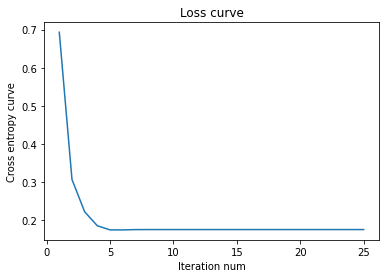

In [31]:
# Plot the loss curve
plt.plot([i+1 for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Cross entropy curve")
plt.show()

In [32]:
our_model_test_acuracy = accuracy_score(y_test, predict(X_test, weights))

print(f"\nAccuracy in testing set by our model: {our_model_test_acuracy}")


Accuracy in testing set by our model: 0.9423076923076923


#### Compare with the scikit learn implementation

In [33]:
# Initialize the model
model = LogisticRegression(solver='newton-cg', verbose=1)

In [34]:
# Fit the model. Wait! We will complete this step for you ;)
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=1,
                   warm_start=False)

In [35]:
# Predict on testing set X_test
y_pred = model.predict(X_test)

In [36]:
# Print Accuracy on testing set
sklearn_test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy in testing set by sklearn model: {sklearn_test_accuracy}")


Accuracy in testing set by sklearn model: 0.9278846153846154
